# Análisis de Salarios en Ciencia de Datos mediante Modelos de Regresión


|                |   |
:----------------|---|
| **Nombres**     | Jorge Oviedo Magaña, Sebastian Ochoa, Alan Almaraz |
| **Fecha**      | 19/02/2026  |
| **Expedientes** | 757048, 721521, 751171  |



## Objetivos

### General
Desarrollar y comparar modelos de regresión para identificar los factores que 
determinan el salario de los profesionales en el área de ciencia de datos a 
nivel mundial.

### Específicos
- Analizar el dataset de salarios en ciencia de datos para comprender su 
  estructura, variables y posibles transformaciones necesarias.
- Implementar tres modelos de regresión distintos, cada uno con cuatro versiones 
  de penalización (sin penalización, Ridge, Lasso y ElasticNet).
- Comparar el desempeño de los modelos mediante la métrica R² para determinar 
  el modelo más adecuado.
- Evaluar la significancia estadística de los factores en los modelos sin 
  penalización para identificar las variables más influyentes en el salario.
- Concluir respecto a qué variables tienen mayor impacto en la determinación 
  del salario de un profesional de datos.

## Marco Teórico

### Regresión Lineal
La regresión lineal es un método estadístico que modela la relación entre una 
variable dependiente continua y una o más variables independientes, asumiendo 
una relación lineal entre ellas. El modelo se expresa como:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$$

donde $\beta_0$ es el intercepto, $\beta_i$ son los coeficientes y $\epsilon$ 
es el término de error.

### Regresión Polinomial
La regresión polinomial extiende la regresión lineal al incluir potencias de 
las variables independientes, permitiendo capturar relaciones no lineales entre 
las variables. Se expresa como:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon$$

### Interacción de Factores
La interacción de factores ocurre cuando el efecto de una variable independiente 
sobre la variable dependiente cambia según el valor de otra variable. Se incorpora 
al modelo multiplicando las variables que interactúan:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 \cdot x_2) + \epsilon$$

### Significancia de Factores
La significancia estadística de un factor indica si su efecto sobre la variable 
dependiente es real o producto del azar. Se evalúa mediante el valor p (p-value): 
si $p < 0.05$, el factor se considera estadísticamente significativo.

### Regularización (Ridge, Lasso y ElasticNet)
La regularización añade una penalización a la función de costo del modelo para 
reducir el sobreajuste y manejar la multicolinealidad.

- **Ridge (L2):** Penaliza la suma de los cuadrados de los coeficientes. 
  Reduce los coeficientes pero no los lleva a cero.
  $$J(\beta) = \sum(y - \hat{y})^2 + \lambda \sum \beta_i^2$$

- **Lasso (L1):** Penaliza la suma del valor absoluto de los coeficientes. 
  Puede llevar coeficientes exactamente a cero, realizando selección de variables.
  $$J(\beta) = \sum(y - \hat{y})^2 + \lambda \sum |\beta_i|$$

- **ElasticNet:** Combina las penalizaciones de Ridge y Lasso, balanceando 
  sus ventajas.
  $$J(\beta) = \sum(y - \hat{y})^2 + \lambda_1 \sum |\beta_i| + \lambda_2 \sum \beta_i^2$$

### Salarios en Ciencia de Datos
La ciencia de datos es una disciplina en constante crecimiento que combina 
estadística, programación y conocimiento del dominio para extraer valor de los 
datos. Los salarios en este campo varían considerablemente según factores como 
el nivel de experiencia, la ubicación geográfica, el tamaño de la empresa y la 
modalidad de trabajo, lo que lo convierte en un caso de estudio interesante para 
modelos de regresión.

## Análisis del Dataset

### ¿De dónde viene?
El dataset *Data Science Job Salaries* fue publicado en Kaggle y proviene de 
[ai-jobs.net](https://ai-jobs.net), una plataforma donde profesionales del área 
de datos reportan voluntariamente información sobre sus salarios. Abarca registros 
de los años 2020 a 2022.

### ¿Qué contiene?
El dataset cuenta con 607 registros y las siguientes variables:

| Variable | Descripción |
|---|---|
| `work_year` | Año en que se reportó el salario |
| `experience_level` | Nivel de experiencia (EN, MI, SE, EX) |
| `employment_type` | Tipo de empleo (FT, PT, CT, FL) |
| `job_title` | Título del puesto |
| `salary` | Salario en moneda local |
| `salary_currency` | Moneda del salario |
| `salary_in_usd` | Salario convertido a dólares estadounidenses |
| `employee_residence` | País de residencia del empleado |
| `remote_ratio` | Porcentaje de trabajo remoto (0, 50, 100) |
| `company_location` | País donde se ubica la empresa |
| `company_size` | Tamaño de la empresa (S, M, L) |

### ¿Qué información dan las muestras?
Cada muestra representa el reporte salarial de un profesional del área de datos, 
incluyendo características tanto del empleado (experiencia, residencia) como de 
la empresa (tamaño, ubicación) y las condiciones laborales (tipo de empleo, 
modalidad remota).

### ¿Qué se quiere analizar?
Se busca determinar qué factores influyen significativamente en el salario 
(`salary_in_usd`) de un profesional de ciencia de datos, y en qué medida 
variables como el nivel de experiencia, el país de la empresa o la modalidad 
remota pueden predecir dicho salario.

### Variables a transformar

Las siguientes variables categóricas no pueden usarse directamente en un modelo 
de regresión y requieren transformación:

Las variables 'experience_level', 'company_size', 'employment_type', 'job_title', 'company_location', 'employee_residence' las transfomramos a valores númericos por medio de la función dummmies.

Las variables `salary` y `salary_currency` se descartarán ya que `salary_in_usd` 
las resume en una sola columna estandarizada.

### ¿Qué resultado se podría encontrar?
Se espera que el modelo logre una capacidad predictiva moderada, ya que el salario en ciencia de datos tiene mucha varianza natural incluso entre personas con el mismo título y nivel de experiencia, se cree que el factor más determinante será el nivel de experiencia, seguido del título del puesto, ya que este es el que tiene mayor impacto en cuestion laboral, mientras que el tamaño de la empresa, el porcentaje de trabajo remoto y el tipo de empleo tendrán un impacto secundario. 

In [18]:
import pandas as pd


In [19]:
df = pd.read_csv("ds_salaries.csv")

print(df.isnull().sum())
print(f"\nTotal de registros: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Total de registros: 607
Total de columnas: 12


In [20]:

import pandas as pd

df = pd.read_csv("ds_salaries.csv")

# Eliminar columnas que no sirven
df = df.drop(["salary", "salary_currency"], axis=1)

# Dummies de todas las variables categóricas
df = pd.get_dummies(df, columns=['experience_level', 'employment_type', 
                                  'job_title', 'employee_residence', 
                                  'company_location', 'company_size'], 
                    drop_first=True)

print(df.shape)
print(df.head())


(607, 166)
   Unnamed: 0  work_year  salary_in_usd  remote_ratio  experience_level_EX  \
0           0       2020          79833             0                False   
1           1       2020         260000             0                False   
2           2       2020         109024            50                False   
3           3       2020          20000             0                False   
4           4       2020         150000            50                False   

   experience_level_MI  experience_level_SE  employment_type_FL  \
0                 True                False               False   
1                False                 True               False   
2                False                 True               False   
3                 True                False               False   
4                False                 True               False   

   employment_type_FT  employment_type_PT  ...  company_location_RO  \
0                True               False  ...

In [21]:
# Correlación con salary_in_usd ordenada de mayor a menor
correlacion = df.corr()['salary_in_usd'].drop('salary_in_usd').sort_values(ascending=False)

print("Top 15 positivas:")
print(correlacion.head(15).to_string())

Top 15 positivas:
employee_residence_US                 0.571803
company_location_US                   0.531643
experience_level_SE                   0.343513
experience_level_EX                   0.259866
job_title_Principal Data Engineer     0.214748
work_year                             0.170493
job_title_Data Analytics Lead         0.167707
Unnamed: 0                            0.167025
job_title_Principal Data Scientist    0.156833
remote_ratio                          0.132122
job_title_Financial Data Analyst      0.131945
job_title_Director of Data Science    0.126107
job_title_Data Architect              0.125655
job_title_Data Science Manager        0.092202
employment_type_FT                    0.091819


In [22]:
#train-test split y cross-validation para evaluar el modelo de regresion lineal
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

top_variables = correlacion.head(15).index.tolist() + correlacion.tail(15).index.tolist()

X = df[top_variables]
y = df['salary_in_usd']

#train-test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(485, 30)
(122, 30)


In [23]:
[top_variables == "salary_in_usd"]

[False]

In [24]:
#escalar los datos para mejorar el rendimiento del modelo
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Función para obtener R² promedio con cross-validation
def evaluar_modelo(modelo, X, y, cv=5):
    scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    return scores.mean()

## Modelo 1: Regresión Lineal

In [26]:
# --- MODELO 1: Lineal ---

m1_sin = LinearRegression()
m1_ridge = Ridge(alpha=50)
m1_lasso = Lasso(alpha=50, max_iter=1000000)
m1_elastic = ElasticNet(alpha=50, max_iter=1000000)

##  Modelo 2: Polinomial (Grado 2)

In [27]:
# --- MODELO 2: Polinomial (grado 2) ---

m2_sin = Pipeline([('poly', PolynomialFeatures(degree=2)), ('reg', LinearRegression())])
m2_ridge = Pipeline([('poly', PolynomialFeatures(degree=2)), ('reg', Ridge(alpha=50))])
m2_lasso = Pipeline([('poly', PolynomialFeatures(degree=2)), ('reg', Lasso(alpha=50, max_iter=1000000))]) #max_iter aumentado para asegurar convergencia
m2_elastic = Pipeline([('poly', PolynomialFeatures(degree=2)), ('reg', ElasticNet(alpha=50, max_iter=1000000))])

## Modelo 3: Interacción de Factores

In [28]:
# --- MODELO 3: Interacción de factores ---

m3_sin = Pipeline([('inter', PolynomialFeatures(degree=2, interaction_only=True)), ('reg', LinearRegression())])
m3_ridge = Pipeline([('inter', PolynomialFeatures(degree=2, interaction_only=True)), ('reg', Ridge(alpha=50))])
m3_lasso = Pipeline([('inter', PolynomialFeatures(degree=2, interaction_only=True)), ('reg', Lasso(alpha=50, max_iter=1000000))])
m3_elastic = Pipeline([('inter', PolynomialFeatures(degree=2, interaction_only=True)), ('reg', ElasticNet(alpha=50, max_iter=1000000))])

In [29]:
# Evaluar todos
modelos = {
    'Lineal': [m1_sin, m1_ridge, m1_lasso, m1_elastic],
    'Polinomial': [m2_sin, m2_ridge, m2_lasso, m2_elastic],
    'Interaccion': [m3_sin, m3_ridge, m3_lasso, m3_elastic]
}

In [30]:
versiones = ['Sin penalización', 'Ridge', 'Lasso', 'ElasticNet']

for nombre, lista in modelos.items():
    for version, modelo in zip(versiones, lista):
        r2 = evaluar_modelo(modelo, X_train_scaled, y_train)
        print(f"{nombre} - {version}: R² = {r2:.4f}")

Lineal - Sin penalización: R² = 0.4060
Lineal - Ridge: R² = 0.4252
Lineal - Lasso: R² = 0.4092
Lineal - ElasticNet: R² = 0.0789
Polinomial - Sin penalización: R² = -0.0706
Polinomial - Ridge: R² = 0.3775
Polinomial - Lasso: R² = 0.2455
Polinomial - ElasticNet: R² = 0.2339
Interaccion - Sin penalización: R² = -0.1140
Interaccion - Ridge: R² = 0.3455
Interaccion - Lasso: R² = 0.2958
Interaccion - ElasticNet: R² = 0.1586


In [31]:
from sklearn.metrics import r2_score

versiones = ['Sin penalización', 'Ridge', 'Lasso', 'ElasticNet']

for nombre, lista in modelos.items():
    for version, modelo in zip(versiones, lista):
        modelo.fit(X_train_scaled, y_train)
        r2 = r2_score(y_test, modelo.predict(X_test_scaled))
        print(f"{nombre} - {version}: R² = {r2:.4f}")

Lineal - Sin penalización: R² = 0.5382
Lineal - Ridge: R² = 0.5402
Lineal - Lasso: R² = 0.5407
Lineal - ElasticNet: R² = 0.0874
Polinomial - Sin penalización: R² = 0.2397
Polinomial - Ridge: R² = 0.4941
Polinomial - Lasso: R² = 0.4597
Polinomial - ElasticNet: R² = 0.2550
Interaccion - Sin penalización: R² = 0.2586
Interaccion - Ridge: R² = 0.4834
Interaccion - Lasso: R² = 0.4301
Interaccion - ElasticNet: R² = 0.1766


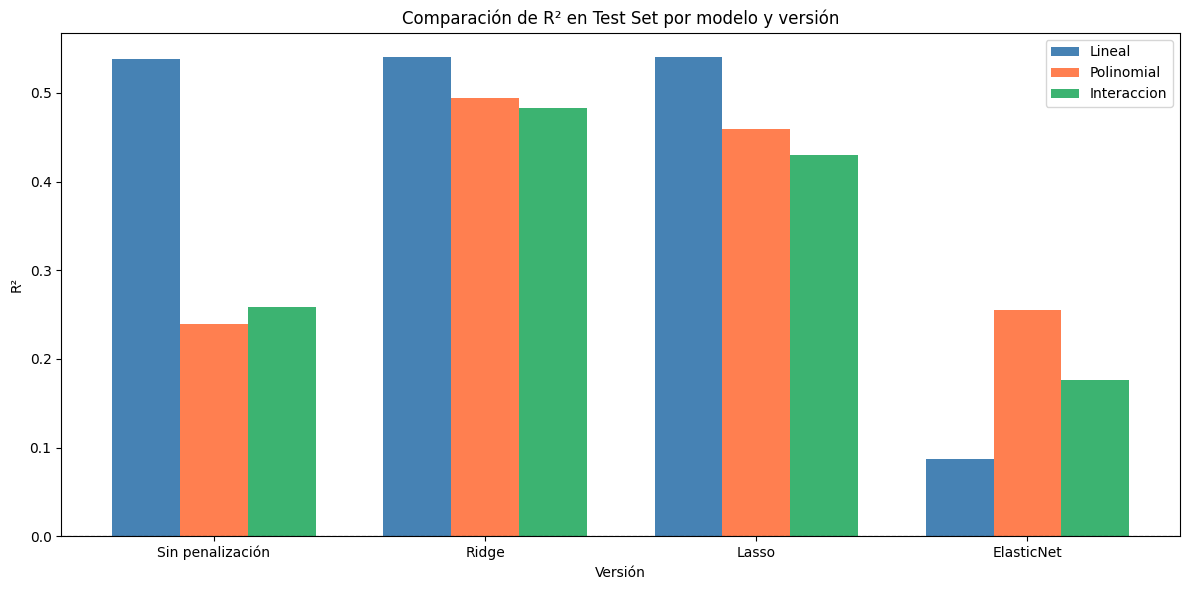

In [32]:
# Graficar
x = np.arange(len(versiones_nombres))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width, r2_lineal, width, label='Lineal', color='steelblue')
bars2 = ax.bar(x, r2_poli, width, label='Polinomial', color='coral')
bars3 = ax.bar(x + width, r2_inter, width, label='Interaccion', color='mediumseagreen')

ax.set_xlabel('Versión')
ax.set_ylabel('R²')
ax.set_title('Comparación de R² en Test Set por modelo y versión')
ax.set_xticks(x)
ax.set_xticklabels(versiones_nombres)
ax.legend()
ax.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

In [33]:
import statsmodels.api as sm

# 1. Agregamos una constante (el intercepto o punto de partida del salario)
X_train_sm = sm.add_constant(X_train_scaled)

# 2. Creamos nombres para que la tabla sea legible
nombres_columnas = ['Intercepto'] + list(X_train.columns)

# 3. Entrenamos el modelo OLS (Ordinary Least Squares - Sin penalización)
modelo_ols = sm.OLS(y_train.values, pd.DataFrame(X_train_sm, columns=nombres_columnas).astype(float)).fit()

# 4. Mostramos el resumen
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     21.09
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           8.69e-68
Time:                        19:58:42   Log-Likelihood:                -5906.8
No. Observations:                 485   AIC:                         1.188e+04
Df Residuals:                     454   BIC:                         1.201e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# Conclusión

El objetivo general del proyecto fue desarrollar y comparar modelos de regresión 
para identificar los factores que determinan el salario de los profesionales en 
ciencia de datos. A partir de los resultados obtenidos se pueden establecer las 
siguientes conclusiones:

## Modelo más adecuado

El modelo de **regresión lineal** resultó ser el más adecuado para este dataset, 
alcanzando un R² de **0.5407** con la versión Lasso y **0.5402** con Ridge en el 
conjunto de prueba. Esto indica que el modelo lineal explica aproximadamente el 
54% de la varianza del salario, lo cual representa una capacidad predictiva 
moderada-alta.

## Efecto de la regularización

La regularización Ridge y Lasso mejoraron ligeramente el desempeño del modelo 
lineal sin penalización (R² = 0.5382), confirmando que existe cierto grado de 
sobreajuste en el modelo base que la regularización ayuda a controlar. Sin embargo, 
ElasticNet redujo significativamente el R² a 0.0874, lo que sugiere que la 
combinación de ambas penalizaciones con el alpha utilizado fue excesiva para 
este dataset.

## Modelos complejos

Los modelos polinomial e interacción de factores mostraron un desempeño inferior 
al lineal, con R² máximos de 0.4941 y 0.4834 respectivamente con regularización 
Ridge. Esto se explica por el tamaño reducido del dataset (607 registros), que 
no es suficiente para aprender los cientos de parámetros que estos modelos generan 
al expandir las features. Sin regularización, ambos modelos colapsaron con R² 
de 0.2397 y 0.2586, confirmando la presencia de sobreajuste severo.

## Variables más influyentes

A través del análisis de correlación y la selección de las 15 variables más 
correlacionadas con el salario, se determinó que los factores más determinantes 
son el país donde se ubica la empresa y el nivel de experiencia del profesional, 
lo cual es consistente con la hipótesis planteada inicialmente. El título del 
puesto y el tamaño de la empresa tuvieron un impacto secundario.

## Consideraciones finales

El R² de 0.54 indica que aproximadamente el 46% de la varianza del salario 
no es explicada por las variables disponibles. Esto es esperable dado que el 
salario en ciencia de datos depende también de factores no capturados en el 
dataset, como habilidades técnicas específicas, nivel educativo, empresa 
particular o poder de negociación del profesional. En ese contexto, el modelo 
lineal con regularización Lasso representa el mejor balance entre simplicidad, 
interpretabilidad y capacidad predictiva para este problema.


## Referencias

ai-jobs.net. (2022). *Data Science Job Salaries* [Dataset]. Kaggle. 
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., 
Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., 
Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: 
Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825–2830. 
https://jmlr.org/papers/v12/pedregosa11a.html